<a href="https://colab.research.google.com/github/arinze-mbamalu/data_storage_retrieval/blob/main/Advanced_SQL(PgSQL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#        Data Storage and Retrieval

### Task 1: Create and populate a database using the data from the provided "books" CSV file.

In [ ]:
'''if psycopg2 has not been installed, then execute the following statement to install the package'''
!pip install psycopg2

import psycopg2      # import the PostgreSQL database adapter
import csv           #import this csv library to read a csv file

In [ ]:
# Database connection parameters
DB_HOST = "localhost"
DB_NAME = "SMART_LIB"
DB_USER = "postgres"
DB_PASSWORD = "Passw0rd"
DB_PORTNUMBER="5432"

# PostgreSQL function to connect to the database
def connect_to_db():
    return psycopg2.connect(
        dbname=DB_NAME,
        user=DB_USER,
        password=DB_PASSWORD,
        host=DB_HOST,
        port=DB_PORTNUMBER)


In [ ]:
# Create table in Postgresql
conn = connect_to_db() # connect to PostgreSQL
cur = conn.cursor()    # Executes PostgreSQL command in a database session

# Using the create table SQL statements to create the books table in the postgresql database
sql = '''CREATE TABLE books(bookID Integer PRIMARY KEY,title VARCHAR(200) NOT NULL,authors VARCHAR(200) NOT NULL,
average_rating FLOAT,isbn VARCHAR(100) NOT NULL,isbn13 BIGINT NOT NULL,language_code VARCHAR(20) NOT NULL, num_pages INTEGER NOT NULL,
ratings_count INTEGER NOT NULL,text_reviews_count INTEGER NOT NULL,publication_date DATE, publisher VARCHAR(100) NOT NULL)'''
cur.execute(sql)  # Runs or executes the query

conn.commit() # Save to the database
print("Table created successfully")

Table created successfully


In [ ]:
# Main function to populate data in the database
def insert_data():
    conn = connect_to_db()  #Connect to PostgreSQL
    cur = conn.cursor()    # Executes PostgreSQL command in a database session

# Drop the book.csv file in the root folder of the python application or specify the path of the csv file if not in the python root folder
# Using the with statements and the open function; open the book.csv file to read the file
    with open('book.csv','r') as file:
        data_reader=csv.reader(file)
        next(data_reader) # skip the header row

    #Iterate or loop over the book csv file and insert each row into the books table
        for row in data_reader:
            cur.execute("INSERT INTO books(bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher) VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)", row)

    conn.commit() # Save to the database
    cur.close()  # Close Postgresql command in a database session
    conn.close() # Close database connection
    print("Data populated successfully")


# Executes the Main function(insert_data) as a script
if __name__ == "__main__":
    insert_data()

Data populated successfully


### Screenshot of the database in pgAdmin

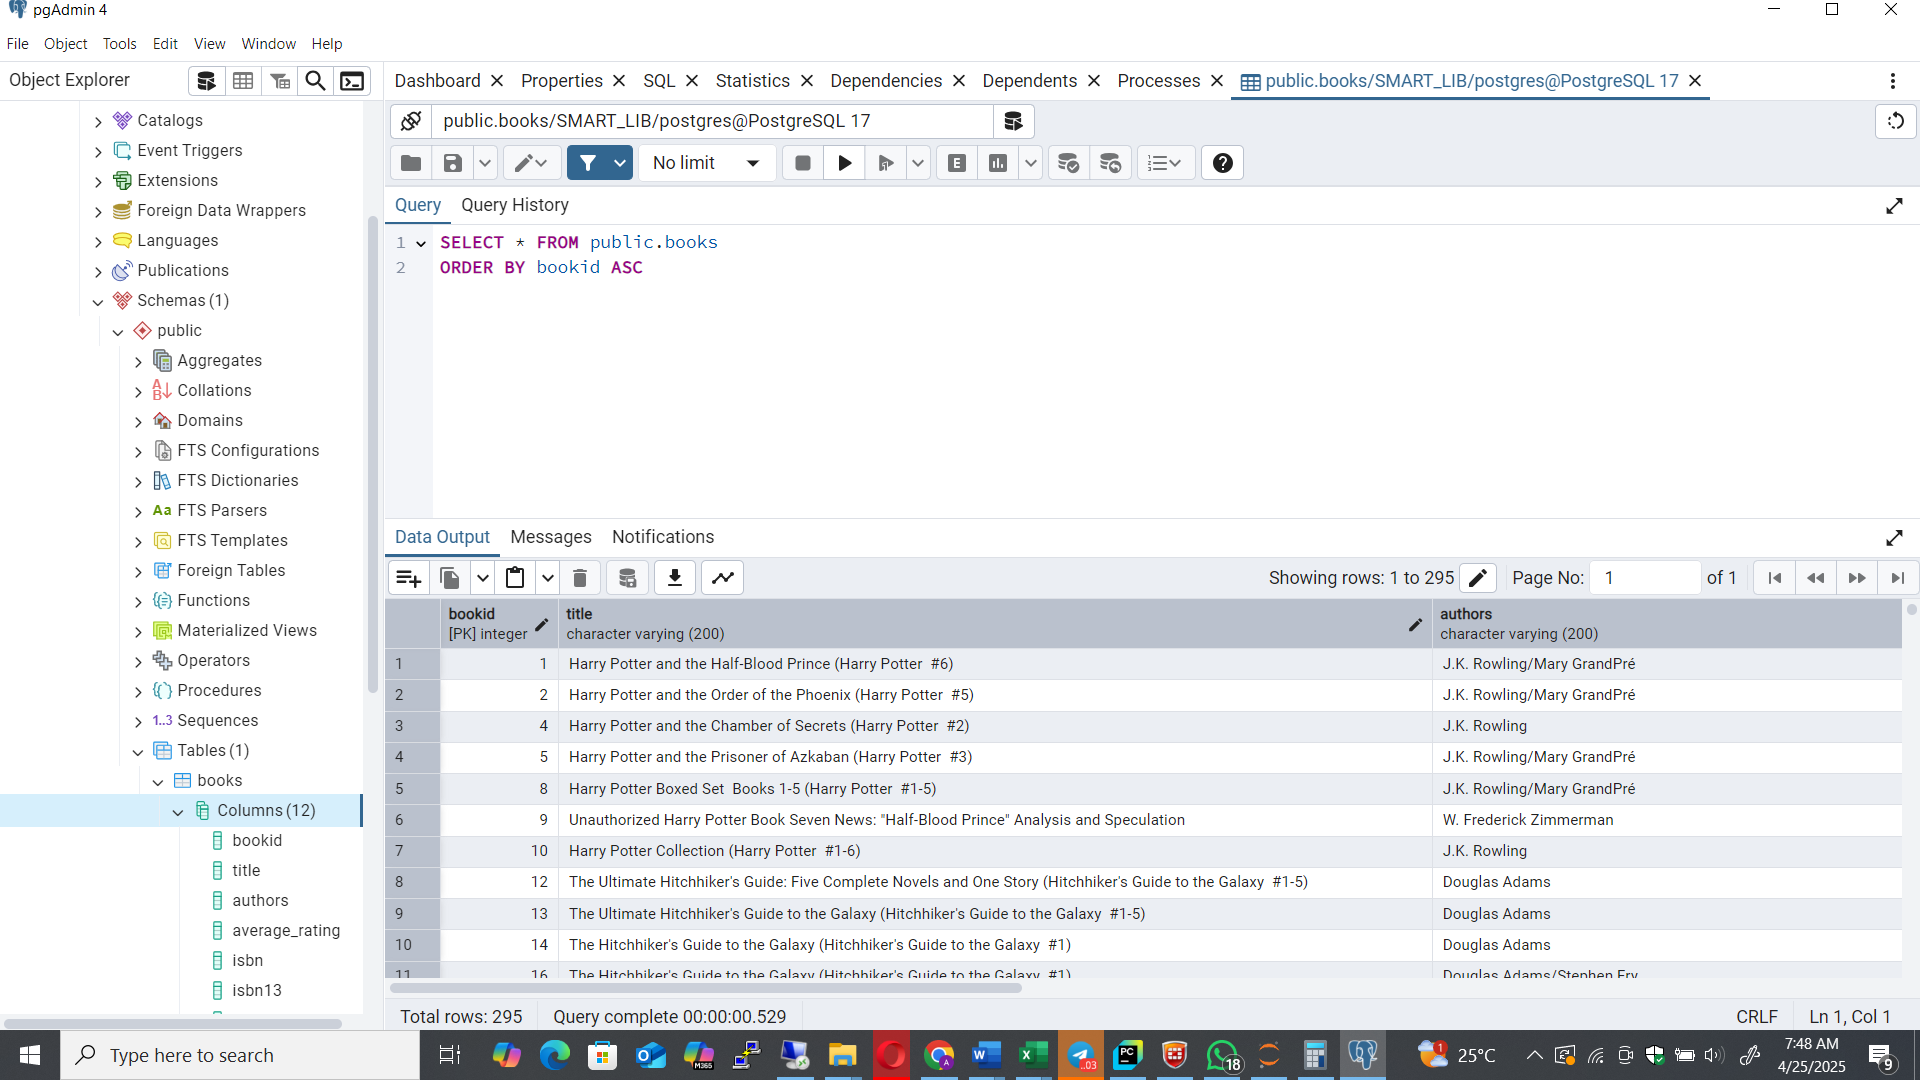![image.png](attachment:image.png)

### Task 2: Database Queries.

In [ ]:
# Query and execute the number of books that have ratings greater or equal to 4.5 from the books table using the COUNT function
cur.execute("SELECT count(*) as COUNT FROM books WHERE average_rating >= 4.5;")

print(cur.fetchall())  # fetches all rows of a query result set

[(19,)]


In [ ]:
# Query and execute the mean value of average ratings of all the books using the AVG function
cur.execute("SELECT AVG(average_rating) as Mean_Value FROM books;")

print(cur.fetchall())  # fetches all rows of a query result set

[(3.929389830508472,)]


In [ ]:
# Query and execute the records using a sub query to find the highest number of pages using the MAX function
cur.execute("SELECT title,authors FROM books WHERE num_pages in (SELECT MAX(num_pages) FROM books);")

print(cur.fetchall())  # fetches all rows of a query result set

[('Harry Potter Collection (Harry Potter  #1-6)', 'J.K. Rowling')]
